In [1]:
#importciones 
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
from plotly import tools
from plotly.offline import iplot, init_notebook_mode
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


# Data analysis and wrangling
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

pokedex = pd.read_csv('/content/drive/My Drive/Colab Notebooks/pokemon.csv')

pokedex

,id,pokemon,species_id,height,weight,base_experience,type_1,type_2,attack,defense,hp,special_attack,special_defense,speed,ability_1,ability_2,ability_hidden,color_1,color_2,color_f,egg_group_1,egg_group_2,url_image,generation_id,evolves_from_species_id,evolution_chain_id,shape_id,shape
0,1,bulbasaur,1,7,69,64,grass,poison,49,49,45,65,65,45,overgrow,NaN,chlorophyll,#78C850,#A040A0,#81A763,monster,plant,1.png,1.0,NaN,1.0,8.0,quadruped
1,2,ivysaur,2,10,130,142,grass,poison,62,63,60,80,80,60,overgrow,NaN,chlorophyll,#78C850,#A040A0,#81A763,monster,plant,2.png,1.0,1.0,1.0,8.0,quadruped
2,3,venusaur,3,20,1000,236,grass,poison,82,83,80,100,100,80,overgrow,NaN,chlorophyll,#78C850,#A040A0,#81A763,monster,plant,3.png,1.0,2.0,1.0,8.0,quadruped
3,4,charmander,4,6,85,62,fire,NaN,52,43,39,60,50,65,blaze,NaN,solar-power,#F08030,NaN,NaN,monster,dragon,4.png,1.0,NaN,2.0,6.0,upright
4,5,charmeleon,5,11,190,142,fire,NaN,64,58,58,80,65,80,blaze,NaN,solar-power,#F08030,NaN,NaN,monster,dragon,5.png,1.0,4.0,2.0,6.0,upright
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,10086,hoopa-unbound,720,650,4900,306,psychic,dark,160,60,80,170,130,80,magician,NaN,NaN,#F85888,#705848,#D75878,no-eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN
807,10087,camerupt-mega,323,250,3205,196,fire,ground,120,100,70,145,105,20,sheer-force,NaN,NaN,#F08030,#E0C068,#EC8F3D,ground,NaN,NaN,NaN,NaN,NaN,NaN,NaN
808,10088,lopunny-mega,428,130,283,203,normal,fighting,136,94,65,54,96,135,scrappy,NaN,NaN,#A8A878,#C03028,#AD8A64,ground,humanshape,NaN,NaN,NaN,NaN,NaN,NaN
809,10089,salamence-mega,373,180,1126,315,dragon,flying,145,130,95,120,90,120,aerilate,NaN,NaN,#7038F8,#A890F0,#7D4DF6,dragon,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
pokedex.head()


,id,pokemon,species_id,height,weight,base_experience,type_1,type_2,attack,defense,hp,special_attack,special_defense,speed,ability_1,ability_2,ability_hidden,color_1,color_2,color_f,egg_group_1,egg_group_2,url_image,generation_id,evolves_from_species_id,evolution_chain_id,shape_id,shape
0,1,bulbasaur,1,7,69,64,grass,poison,49,49,45,65,65,45,overgrow,NaN,chlorophyll,#78C850,#A040A0,#81A763,monster,plant,1.png,1.0,NaN,1.0,8.0,quadruped
1,2,ivysaur,2,10,130,142,grass,poison,62,63,60,80,80,60,overgrow,NaN,chlorophyll,#78C850,#A040A0,#81A763,monster,plant,2.png,1.0,1.0,1.0,8.0,quadruped
2,3,venusaur,3,20,1000,236,grass,poison,82,83,80,100,100,80,overgrow,NaN,chlorophyll,#78C850,#A040A0,#81A763,monster,plant,3.png,1.0,2.0,1.0,8.0,quadruped
3,4,charmander,4,6,85,62,fire,NaN,52,43,39,60,50,65,blaze,NaN,solar-power,#F08030,NaN,NaN,monster,dragon,4.png,1.0,NaN,2.0,6.0,upright
4,5,charmeleon,5,11,190,142,fire,NaN,64,58,58,80,65,80,blaze,NaN,solar-power,#F08030,NaN,NaN,monster,dragon,5.png,1.0,4.0,2.0,6.0,upright


In [ ]:
pokedex.tail()

,id,pokemon,species_id,height,weight,base_experience,type_1,type_2,attack,defense,hp,special_attack,special_defense,speed,ability_1,ability_2,ability_hidden,color_1,color_2,color_f,egg_group_1,egg_group_2,url_image,generation_id,evolves_from_species_id,evolution_chain_id,shape_id,shape
806,10086,hoopa-unbound,720,650,4900,306,psychic,dark,160,60,80,170,130,80,magician,NaN,NaN,#F85888,#705848,#D75878,no-eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN
807,10087,camerupt-mega,323,250,3205,196,fire,ground,120,100,70,145,105,20,sheer-force,NaN,NaN,#F08030,#E0C068,#EC8F3D,ground,NaN,NaN,NaN,NaN,NaN,NaN,NaN
808,10088,lopunny-mega,428,130,283,203,normal,fighting,136,94,65,54,96,135,scrappy,NaN,NaN,#A8A878,#C03028,#AD8A64,ground,humanshape,NaN,NaN,NaN,NaN,NaN,NaN
809,10089,salamence-mega,373,180,1126,315,dragon,flying,145,130,95,120,90,120,aerilate,NaN,NaN,#7038F8,#A890F0,#7D4DF6,dragon,NaN,NaN,NaN,NaN,NaN,NaN,NaN
810,10090,beedrill-mega,15,140,405,223,bug,poison,150,40,65,15,80,145,adaptability,NaN,NaN,#A8B820,#A040A0,#A69A3F,bug,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
pokedex.shape

(811, 28)

In [ ]:
pokedex.columns

Index(['id', 'pokemon', 'species_id', 'height', 'weight', 'base_experience',
       'type_1', 'type_2', 'attack', 'defense', 'hp', 'special_attack',
       'special_defense', 'speed', 'ability_1', 'ability_2', 'ability_hidden',
       'color_1', 'color_2', 'color_f', 'egg_group_1', 'egg_group_2',
       'url_image', 'generation_id', 'evolves_from_species_id',
       'evolution_chain_id', 'shape_id', 'shape'],
      dtype='object')

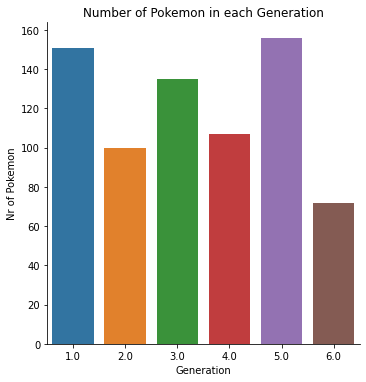

In [ ]:
ax = sns.catplot(x="generation_id", kind="count", data=pokedex);
ax.set(xlabel='Generation', ylabel='Nr of Pokemon', title='Number of Pokemon in each Generation');


In [3]:
STATS_CATEGORIES = ["hp", "attack", "defense", "special_attack", "special_defense", "speed"]

print('All Pokemon:')
for colm in STATS_CATEGORIES:
    print('Max',colm,':',pokedex.loc[pokedex[colm].idxmax()]['pokemon'])
    print('Min',colm,':',pokedex.loc[pokedex[colm].idxmin()]['pokemon'])

firstGen_pokemon = pokedex[pokedex['generation_id']==1]
secondGen_pokemon = pokedex[pokedex['generation_id']==2]
thirdGen_pokemon = pokedex[pokedex['generation_id']==3]
forthGen_pokemon = pokedex[pokedex['generation_id']==4]
fifthGen_pokemon = pokedex[pokedex['generation_id']==5]
sixthGen_pokemon = pokedex[pokedex['generation_id']==6]
megaGen_pokemon = pokedex[pokedex['generation_id'].isnull()]

print()
print('First Gen Pokemon:')
for colm in STATS_CATEGORIES:
    print('Max',colm,':',firstGen_pokemon.loc[firstGen_pokemon[colm].idxmax()]['pokemon'])
    print('Min',colm,':',firstGen_pokemon.loc[firstGen_pokemon[colm].idxmin()]['pokemon'])

print()
print('Second Gen Pokemon:')
for colm in STATS_CATEGORIES:
    print('Max',colm,':',secondGen_pokemon.loc[secondGen_pokemon[colm].idxmax()]['pokemon'])
    print('Min',colm,':',secondGen_pokemon.loc[secondGen_pokemon[colm].idxmin()]['pokemon'])

print()
print('Third Gen Pokemon:')
for colm in STATS_CATEGORIES:
    print('Max',colm,':',thirdGen_pokemon.loc[thirdGen_pokemon[colm].idxmax()]['pokemon'])
    print('Min',colm,':',thirdGen_pokemon.loc[thirdGen_pokemon[colm].idxmin()]['pokemon'])

print()
print('Forth Gen Pokemon:')
for colm in STATS_CATEGORIES:
    print('Max',colm,':',forthGen_pokemon.loc[forthGen_pokemon[colm].idxmax()]['pokemon'])
    print('Min',colm,':',forthGen_pokemon.loc[forthGen_pokemon[colm].idxmin()]['pokemon'])

print()
print('Fifth Gen Pokemon:')
for colm in STATS_CATEGORIES:
    print('Max',colm,':',fifthGen_pokemon.loc[fifthGen_pokemon[colm].idxmax()]['pokemon'])
    print('Min',colm,':',fifthGen_pokemon.loc[fifthGen_pokemon[colm].idxmin()]['pokemon'])

print()
print('Sixth Gen Pokemon:')
for colm in STATS_CATEGORIES:
    print('Max',colm,':',sixthGen_pokemon.loc[sixthGen_pokemon[colm].idxmax()]['pokemon'])
    print('Min',colm,':',sixthGen_pokemon.loc[sixthGen_pokemon[colm].idxmin()]['pokemon'])
  
print()
print('Mega Pokemon:')
for colm in STATS_CATEGORIES:
    print('Max',colm,':',megaGen_pokemon.loc[megaGen_pokemon[colm].idxmax()]['pokemon'])
    print('Min',colm,':',megaGen_pokemon.loc[megaGen_pokemon[colm].idxmin()]['pokemon'])

All Pokemon:
Max hp : blissey
Min hp : shedinja
Max attack : mewtwo-mega-x
Min attack : chansey
Max defense : shuckle
Min defense : chansey
Max special_attack : mewtwo-mega-y
Min special_attack : shuckle
Max special_defense : shuckle
Min special_defense : caterpie
Max speed : deoxys-speed
Min speed : shuckle

First Gen Pokemon:
Max hp : chansey
Min hp : diglett
Max attack : dragonite
Min attack : chansey
Max defense : cloyster
Min defense : chansey
Max special_attack : mewtwo
Min special_attack : magikarp
Max special_defense : articuno
Min special_defense : caterpie
Max speed : electrode
Min speed : slowpoke

Second Gen Pokemon:
Max hp : blissey
Min hp : pichu
Max attack : tyranitar
Min attack : shuckle
Max defense : shuckle
Min defense : blissey
Max special_attack : espeon
Min special_attack : shuckle
Max special_defense : shuckle
Min special_defense : igglybuff
Max speed : crobat
Min speed : shuckle

Third Gen Pokemon:
Max hp : wailord
Min hp : shedinja
Max attack : slaking
Min attac

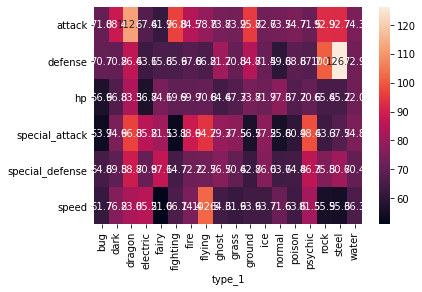

In [ ]:
sns.heatmap(pd.pivot_table(pokedex,values=STATS_CATEGORIES,columns='type_1'),annot=True,fmt='.1f')


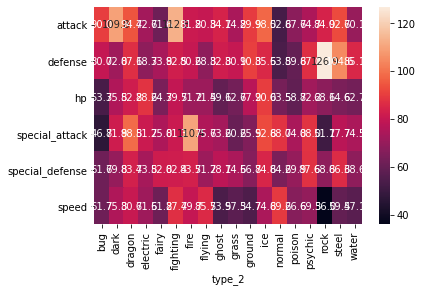

In [ ]:
sns.heatmap(pd.pivot_table(pokedex,values=STATS_CATEGORIES,columns='type_2'),annot=True,fmt='.1f')

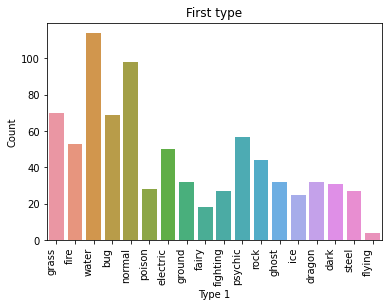

In [ ]:
ax = sns.countplot(x="type_1", data=pokedex);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
ax.set(xlabel='Type 1', ylabel='Count', title='First type');



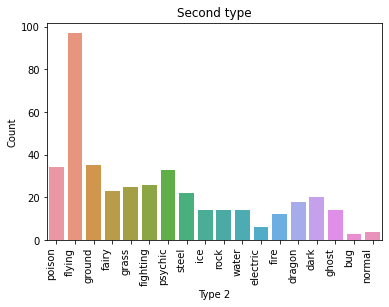

In [ ]:
ax = sns.countplot(x="type_2", data=pokedex);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
ax.set(xlabel='Type 2', ylabel='Count', title='Second type');

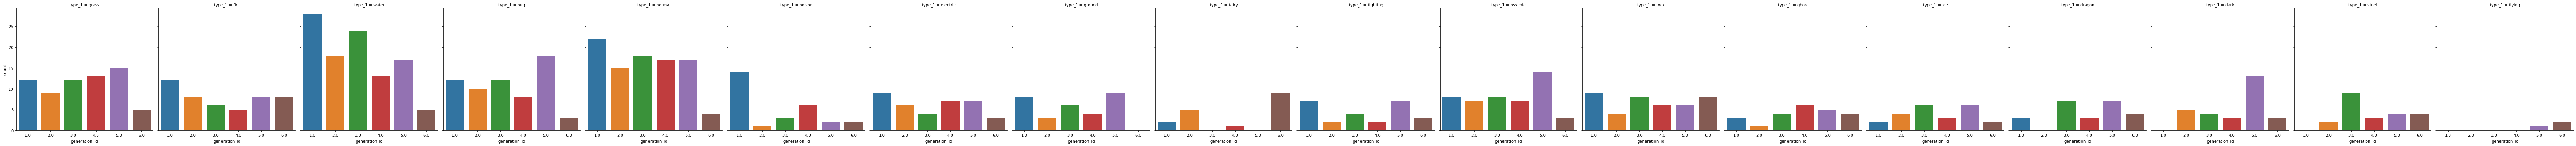

In [ ]:
sns.catplot(x="generation_id", col="type_1", kind="count", data=pokedex);

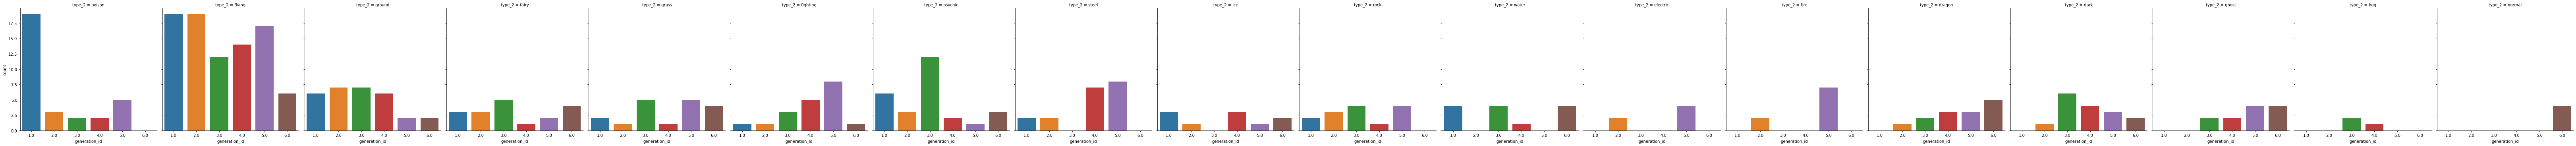

In [ ]:
sns.catplot(x="generation_id", col="type_2", kind="count", data=pokedex);

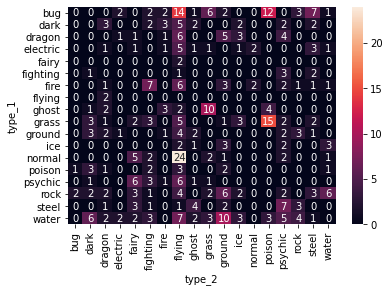

In [ ]:
sns.heatmap(pd.crosstab(pokedex.type_1,pokedex.type_2),annot=True)

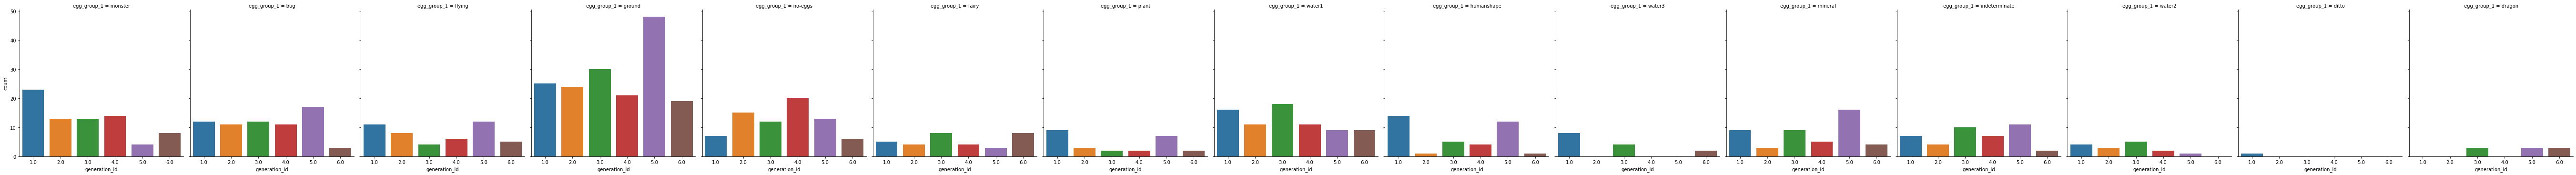

In [ ]:
sns.catplot(x="generation_id", col="egg_group_1", kind="count", data=pokedex);

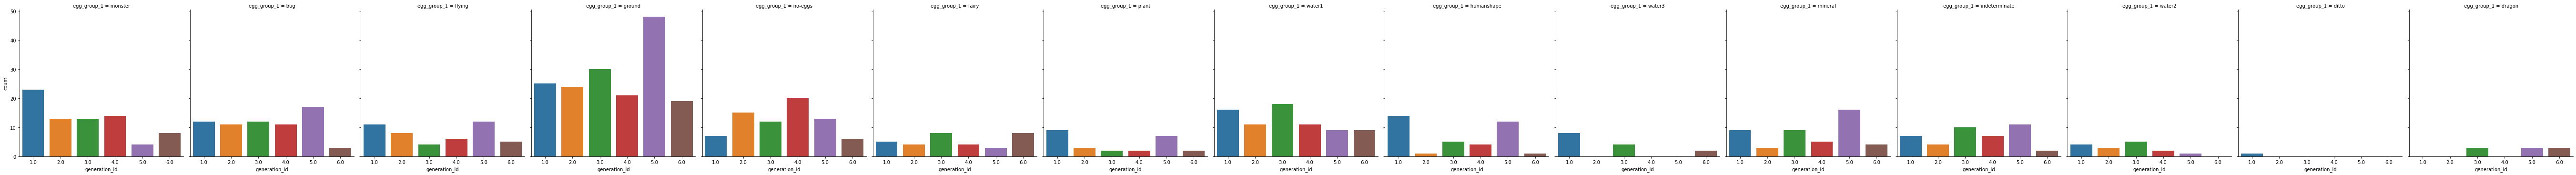

In [ ]:
sns.catplot(x="generation_id", col="egg_group_1", kind="count", data=pokedex);

([<matplotlib.patches.Wedge at 0x7f6abde61208>,
 [Text(0.03621277945565385, 1.0994037632299138, 'Have type 2'),
  Text(-0.03621277945565374, -1.0994037632299138, 'Does not have type 2')],
 [Text(0.019752425157629372, 0.5996747799435893, '49.0%'),
  Text(-0.01975242515762931, -0.5996747799435893, '51.0%')])

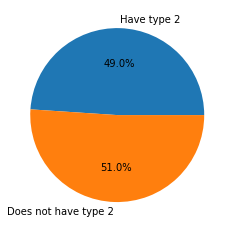

In [ ]:
null_type_2=pokedex.type_2.isnull().sum()
notnull_type_2=pokedex.type_2.size-null_type_2
plt.pie([null_type_2,notnull_type_2],labels=['Have type 2','Does not have type 2'],autopct='%1.1f%%')

In [ ]:
stat_pokedex = pokedex[STATS_CATEGORIES]
stat_pokedex.describe()

,hp,attack,defense,special_attack,special_defense,speed
count,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000
mean,69.014797,78.789149,73.558570,72.713933,71.781751,68.510481
std,25.530950,32.313261,31.109761,32.611473,27.779875,28.953063
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,50.000000,55.000000,50.000000,50.000000,50.000000,45.000000
50%,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000
75%,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000


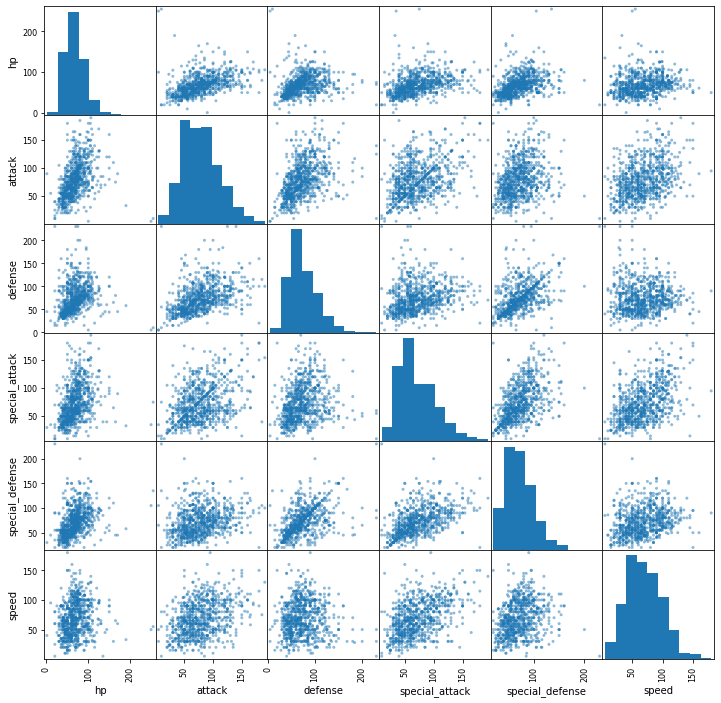

In [ ]:
scatter_matrix(stat_pokedex, figsize=[12,12])
plt.show()

In [4]:
pokedexV2 = pokedex[STATS_CATEGORIES].copy()
#normalize pokedex
normalized_pokedexV2=(pokedexV2-pokedexV2.min())/(pokedexV2.max()-pokedexV2.min())

def radar_chart(pokemon_1_index, pokemon_2_index):
    '''
    Print radarchart of two pokemons
    pokemon_1_index: int, index of pokemon in 'normalized_df'
    pokemon_2_index: int, index of pokemon in 'normalized_df'
    '''
    
    fig = go.Figure()

    fig.add_trace(go.Scatterpolar(
          r=normalized_pokedexV2.loc[pokemon_1_index,:].tolist(),
          theta=STATS_CATEGORIES,
          fill='toself',
          name=pokedex.loc[pokemon_1_index,'pokemon']
    ))
    
    fig.add_trace(go.Scatterpolar(
          r=normalized_pokedexV2.loc[pokemon_2_index,:].tolist(),
          theta=STATS_CATEGORIES,
          fill='toself',
          name=pokedex.loc[pokemon_2_index,'pokemon']
    ))

    fig.update_layout(
      polar=dict(
        radialaxis=dict(
          visible=True,
          range=[0, 1]
        )),
      showlegend=True
    )
    
    fig.update_layout(
        title="Radar Chart: "+pokedex.loc[pokemon_1_index,'pokemon']+" VS "+pokedex.loc[pokemon_2_index,'pokemon'])
    
    fig.show()

radar_chart(pokemon_1_index = 100, pokemon_2_index = 30)



In [ ]:
columns = ['hp', 'attack', 'defense', 'special_attack', 'special_defense', 'speed','type_2']
le = preprocessing.LabelEncoder()
pokedexV3 = pokedex.copy()
pokedexV3.type_2.fillna("nan", inplace = True)
#pokedexV3.type_2.unique()


In [ ]:
pokedexV3['type_1n']=le.fit_transform(pokedexV3['type_1'])
pokedexV3['type_2n']=le.fit_transform(pokedexV3['type_2'])

In [11]:
for x in list(set(pokedexV3['type_1']))[0:]:
  pokedexn = pokedexV3[pokedexV3['type_1']==x]
  fig = px.scatter_matrix(pokedexn[columns],
      dimensions=['attack', 'defense', 'special_attack', 'special_defense', 'speed'],
      height = 1400,
      width=1400,
      color = "type_2")
  fig.update_layout(title=x)
  fig.show()